In [1]:
import pandas as pd

### Plot average rating

In [10]:
path = r'C:\Users\KunalGu\Downloads\sample_dataset_1.csv'
raw_data_1 = pd.read_csv(path, header=None, names=['item', 'user_id', 'rating'])
print(raw_data_1.shape)
print(raw_data_1.head())

(7, 3)
   item  user_id  rating
0  bulb       20     6.5
1  tube       20     5.0
2   fan       20     6.0
3  tube       21     6.0
4  bulb       21     7.0


#### Find number of unique items

In [8]:
raw_data_1.item.nunique()

3

In [7]:
raw_data_1.item.value_counts()

bulb    3
fan     2
tube    2
Name: item, dtype: int64

#### Use groupby() to create groups based on unique items

In [5]:
raw_data_1_gb_item = raw_data_1.groupby('item')

#### Calculate averate score for each item by accessing each group

In [6]:
average_ratings = []
for group_name, group_labels in raw_data_1_gb_item.groups.items():
    average_ratings.append((group_name, group_labels[1].mean()))
average_ratings

[('bulb', 4.0), ('fan', 6.0), ('tube', 3.0)]

#### Create a dataframe from the list of tuples

In [7]:
df_item_average_ratings = pd.DataFrame(average_ratings, columns=['item', 'average_rating'])
df_item_average_ratings

,item,average_rating
0,bulb,4.0
1,fan,6.0
2,tube,3.0


#### Plot a barchart

In [8]:
%matplotlib inline 

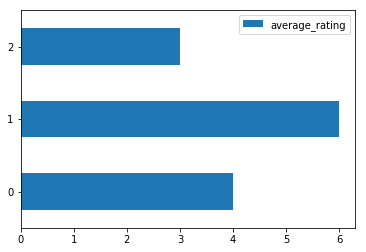

In [9]:
df_item_average_ratings.plot.barh()

#### Set item name as index so that the barchart would get labels automatically

In [10]:
df_item_average_ratings.set_index('item', inplace=True)
df_item_average_ratings

,average_rating
item,
bulb,4.0
fan,6.0
tube,3.0


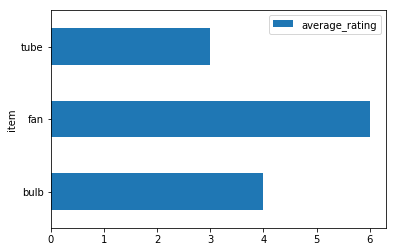

In [11]:
df_item_average_ratings.plot.barh()

#### Create a ordered barchart for faster comprehension

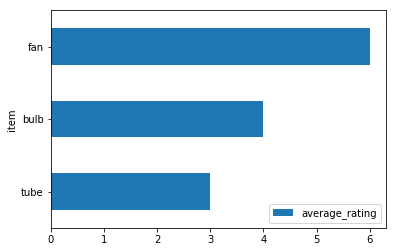

In [12]:
df_item_average_ratings.sort_values(by='average_rating').plot.barh()

##### Note that by default, plot() creates a line plot which is not the best type for this particular case

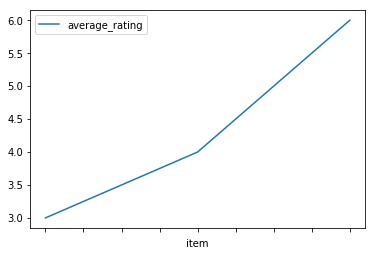

In [13]:
df_item_average_ratings.sort_values(by='average_rating').plot()

#### Use plot() instead of barh() to remove legend and add title

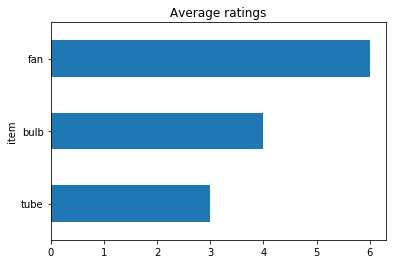

In [14]:
df_item_average_ratings.sort_values(by='average_rating').plot(kind='barh', title='Average ratings', legend=False)

### Task 2: Plot sale amounts for each month

In [15]:
raw_data_2 = pd.read_csv('shampoo_sales_data.csv')
print(raw_data_2.shape)
print(raw_data_2.head())
print(raw_data_2.tail())

(36, 2)
  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3
   Month  Sales
31  3-08  407.6
32  3-09  682.0
33  3-10  475.3
34  3-11  581.3
35  3-12  646.9


#### EDA: to understand the data, including checking for missing values

In [16]:
raw_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Month    36 non-null object
Sales    36 non-null float64
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


In [17]:
for col in raw_data_2.columns:
    print(raw_data_2[col].value_counts())

3-10    1
2-03    1
1-09    1
3-03    1
2-07    1
3-09    1
1-06    1
2-02    1
1-05    1
1-04    1
3-04    1
1-08    1
2-05    1
1-10    1
2-12    1
2-08    1
3-07    1
1-11    1
3-11    1
1-12    1
1-03    1
2-11    1
3-05    1
2-09    1
2-06    1
3-08    1
1-07    1
3-12    1
3-02    1
3-06    1
3-01    1
2-01    1
2-10    1
1-01    1
1-02    1
2-04    1
Name: Month, dtype: int64
646.9    1
339.7    1
180.3    1
289.9    1
303.6    1
191.4    1
192.8    1
682.0    1
575.5    1
264.5    1
226.0    1
287.0    1
273.3    1
149.5    1
336.5    1
224.5    1
168.5    1
440.4    1
315.9    1
194.3    1
439.3    1
185.9    1
210.1    1
231.8    1
119.3    1
421.6    1
475.3    1
145.9    1
437.4    1
183.1    1
122.9    1
407.6    1
581.3    1
401.3    1
342.3    1
266.0    1
Name: Sales, dtype: int64


In [18]:
raw_data_2.set_index('Month', inplace=True)
raw_data_2

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3
1-06,168.5
1-07,231.8
1-08,224.5
1-09,192.8


#### Line plot is the best for time-series data

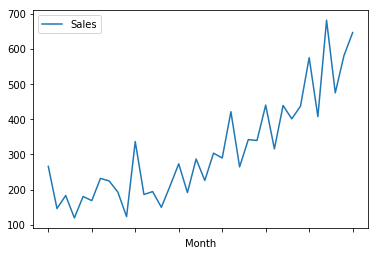

In [19]:
raw_data_2.plot()

#### Demonstration of using histogram for time series data: not the best idea, but if done properly it can present the same data with a different note

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72ebf71590>]],
      dtype=object)

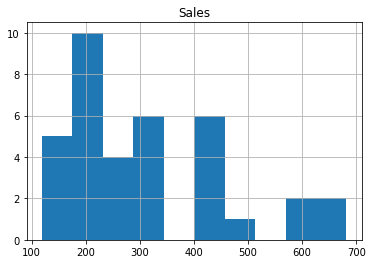

In [20]:
raw_data_2.hist()

#### Fix the bins and the bar alignments, also add lables

In [21]:
import matplotlib.pyplot as plt
import numpy as np

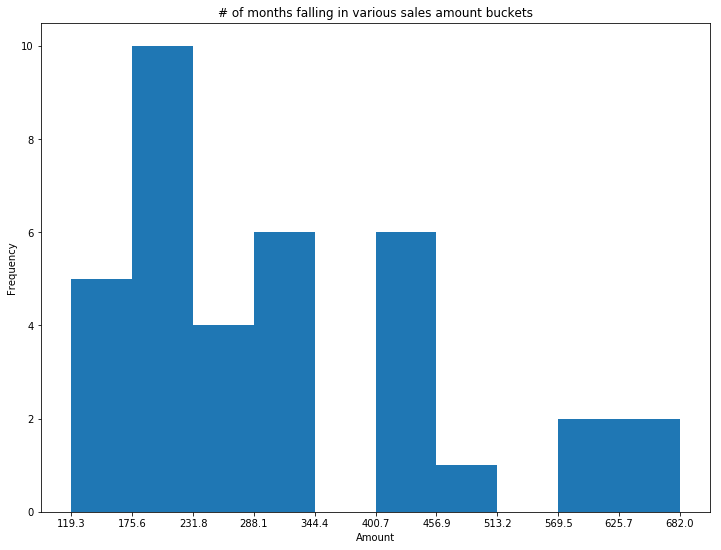

In [22]:
bin_edges = np.histogram_bin_edges(raw_data_2)
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(1,1,1)
ax1.set_title('# of months falling in various sales amount buckets')
ax1.set_xlabel('Amount')
plt.xticks(bin_edges)
raw_data_2.plot(kind='hist', ax=ax1, bins=bin_edges, legend=False)

In [23]:
raw_data_2.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000
